In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
tt = pd.read_excel('../datascience/data/titanic.xls')
tt.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [11]:
# matplotlib 한글 표기 방법
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus'] = False
f_path = 'C:/Windows/Fonts/malgun.ttf'
# f_path = '/library/Fonts/AppleGothic.ttf' (맥)
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

c:\Users\sesac\.conda\envs\sesac\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '나이별 승객 분포')

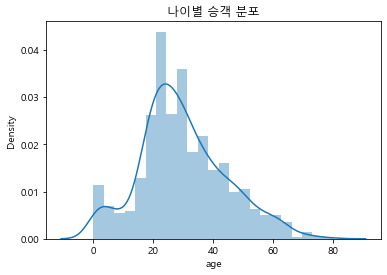

In [12]:
# 1
ax = plt.subplot()
ax = sns.distplot(tt['age'])
ax.set_title('나이별 승객 분포')

c:\Users\sesac\.conda\envs\sesac\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, '승객수')

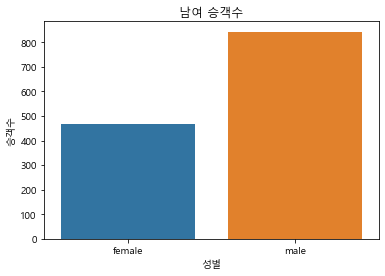

In [13]:
# 2
ax = plt.subplot()
ax = sns.countplot('sex', data=tt)
ax.set_title('남여 승객수')
ax.set_xlabel('성별')
ax.set_ylabel('승객수')

c:\Users\sesac\.conda\envs\sesac\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, '객실')

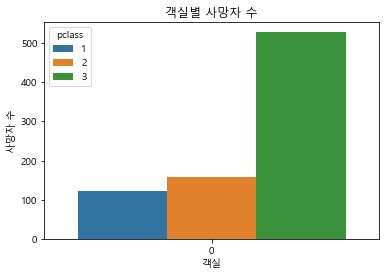

In [14]:
# 2.1
dead_people = tt[tt['survived']==0]
dead_people

ax = plt.subplot()
ax = sns.countplot('survived', hue='pclass', data=dead_people)
ax.set_title('객실별 사망자 수')
ax.set_ylabel('사망자 수')
ax.set_xlabel('객실')

c:\Users\sesac\.conda\envs\sesac\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, '객실')

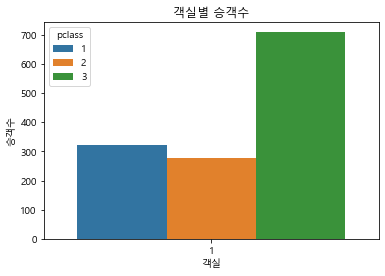

In [15]:
# 2.2
tt['people_count'] = tt['pclass'].apply(lambda x : 1 if x > 0 else 0)

ax = plt.subplot()
ax = sns.countplot('people_count', hue='pclass', data=tt)
ax.set_title('객실별 승객수')
ax.set_ylabel('승객수')
ax.set_xlabel('객실')


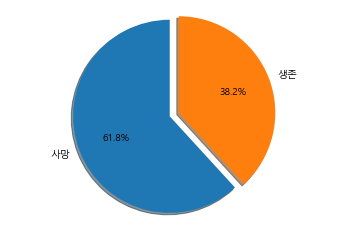

In [16]:
# 3
labels = ['사망', '생존']
sizes = tt['survived'].value_counts()
explode = (0,0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90) # startangle 기준으로 반시계방향 순서
ax1.axis('equal')
plt.show()

c:\Users\sesac\.conda\envs\sesac\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, '생존여부')

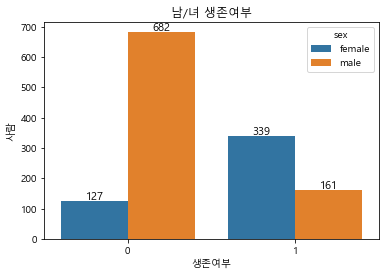

In [48]:
# 4
ax = plt.subplot()
ax = sns.countplot('survived', hue='sex', data=tt, order=tt['survived'].value_counts().index)

# ax(plot).patches = 그래프 요소의 데이터 값 (x, y, width, height)
# Axes.text(x, y, s, fontdict=None, **kwargs) = x,y 텍스트가 위치할 장소
# p.get_x() + p.get_width() / 2 = 가로(x) 좌표
# size(fontsize) = 글자 크기
# ha(horizontalalignment) = 정렬
# height = 높이(y) 좌표
# s = text(어떤 의미인지 모르겠으나 없으면 오류)
for p in ax.patches:
    height = p.get_height()    
    ax.text(p.get_x() + p.get_width() / 2 , height+5, s=height, ha = 'center', size = 11) 

ax.set_title('남/녀 생존여부')
ax.set_ylabel('사람')
ax.set_xlabel('생존여부')


In [28]:
for p in ax.patches:
    print(p)

Rectangle(xy=(-0.4, 0), width=0.4, height=127, angle=0)
Rectangle(xy=(0.6, 0), width=0.4, height=339, angle=0)
Rectangle(xy=(-2.77556e-17, 0), width=0.4, height=682, angle=0)
Rectangle(xy=(1, 0), width=0.4, height=161, angle=0)


In [34]:
tt_survived = tt[tt['survived'] == 0]
tt_survived['sex'].value_counts()

male      682
female    127
Name: sex, dtype: int64

In [35]:
tt_survived = tt[tt['survived'] == 1]
tt_survived['sex'].value_counts()

female    339
male      161
Name: sex, dtype: int64

c:\Users\sesac\.conda\envs\sesac\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, '생존여부')

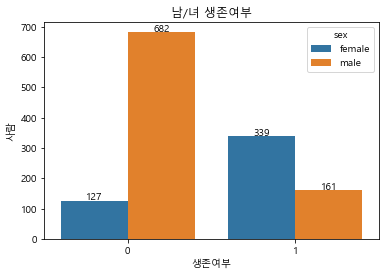

In [39]:
# 4
ax = plt.subplot()
ax = sns.countplot('survived', hue='sex', data=tt, order=tt['survived'].value_counts().index)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 3, height, ha = 'center') # , size = 11

ax.set_title('남/녀 생존여부')
ax.set_ylabel('사람')
ax.set_xlabel('생존여부')
